# Summary

<p class="lead">This notebook summarizes the realtime-kinetic measurements.
</p>

## Requirement

Before running this notebook, you need to pre-process the data with:

- [1-spot bubble-bubble kinetics - Run-All](1-spot bubble-bubble kinetics - Run-All.ipynb)

This pre-processing analyzes all measurement data files, 
compute the moving-window slices, the number of bursts 
and fits the population fractions. All results are saved as CSV in 
the [results](results) folder.

The present notebook loads these results and presents a summary.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
import time
start_time = time.time()
time.ctime()

'Tue Mar 28 00:50:36 2017'

In [3]:
import analysis

numpy: 1.12.1
numba: 0.31.0
lmfit: 0.9.5


In [4]:
filenames = ['singlespot_'+f for f in [
     'bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_1',
     'bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_2',
     'bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_3']]
filenames   

['singlespot_bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_1',
 'singlespot_bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_2',
 'singlespot_bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_3']

# Measurement 0

  PRE Number of bursts (detrended):   290.5 MEAN,    72.6 VAR,  0.250 VAR/MEAN
 POST Number of bursts (detrended):   138.2 MEAN,    17.3 VAR,  0.125 VAR/MEAN
POST2 Number of bursts (detrended):   239.8 MEAN,   639.2 VAR,  2.666 VAR/MEAN
  PRE Kinetics 30s:     3.140 STD, 0.333 STD detrended.
 POST Kinetics 30s:     6.638 STD, 4.765 STD detrended.
POST2 Kinetics 30s:     5.888 STD, 0.152 STD detrended.
 FIT  Simple Exp (t0_vary=False):  tau(w=30s) = 81.6s  tau(w=180s) = 21.8s  Delta = 73.3%
 FIT  Window Exp (t0_vary=False):  tau(w=30s) = 104.5s  tau(w=180s) = 108.6s  Delta = -4.0%
 FIT  Simple Exp (t0_vary=True):  tau(w=30s) = 115.4s  tau(w=180s) = 111.7s  Delta = 3.2%


/Users/anto/miniconda3/lib/python3.5/site-packages/lmfit/confidence.py:295: UserWarning: Warning, rel_change=-0.0003946019150119747 < 0.01  at iteration 62 and prob(t0=59.56576199156436) = 0.9696902908404538 < max(sigmas).
  warn(errmsg)


 FIT  Window Exp (t0_vary=True):  tau(w=30s) = 113.7s  tau(w=180s) = 99.8s  Delta = 12.2%


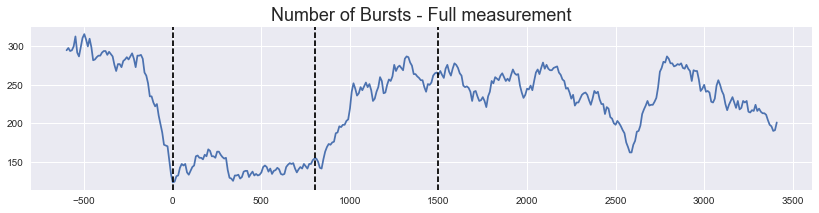

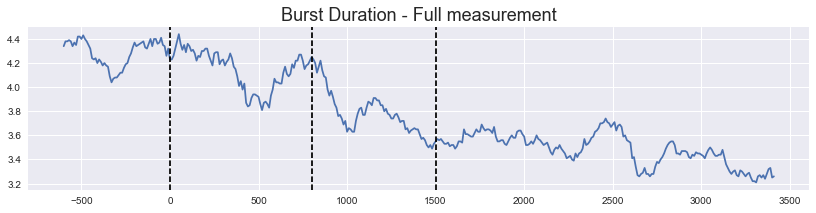

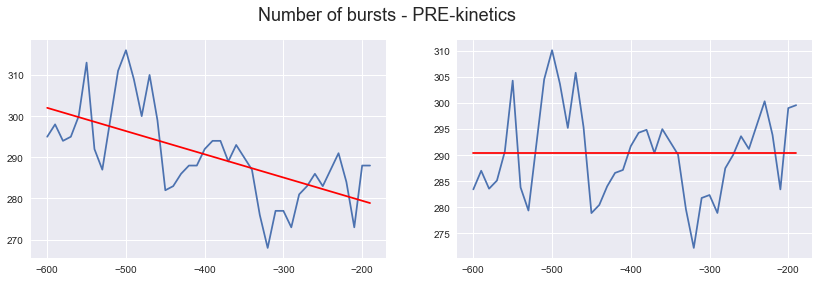

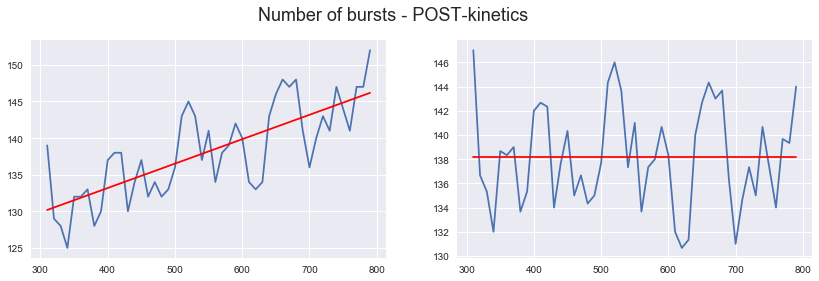

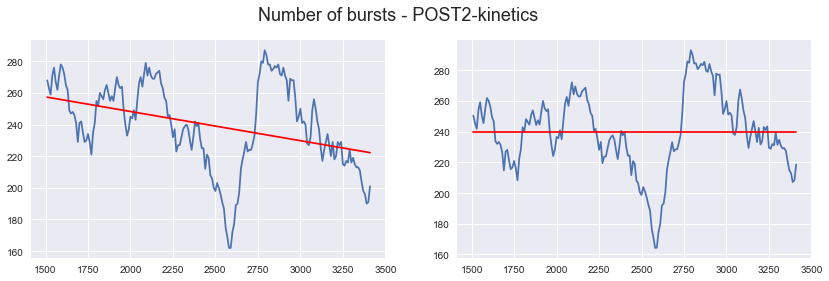

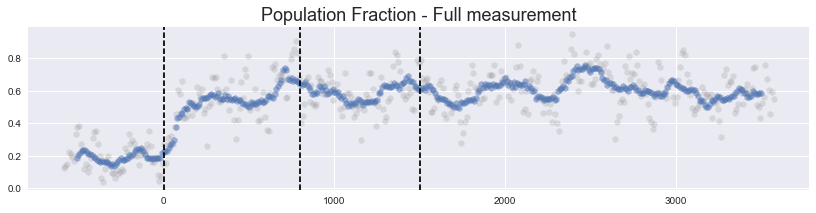

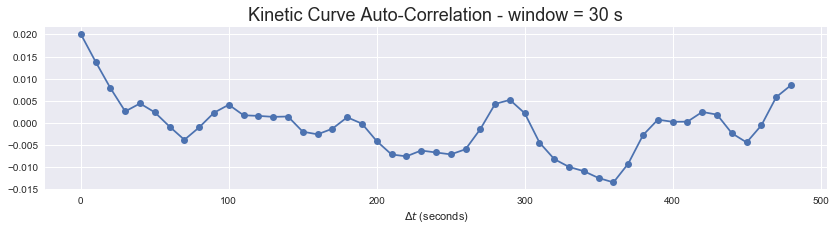

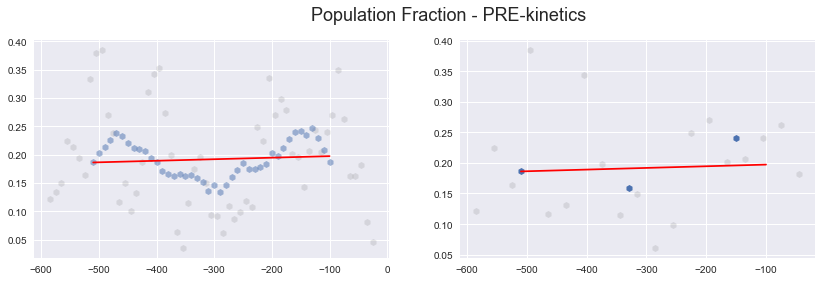

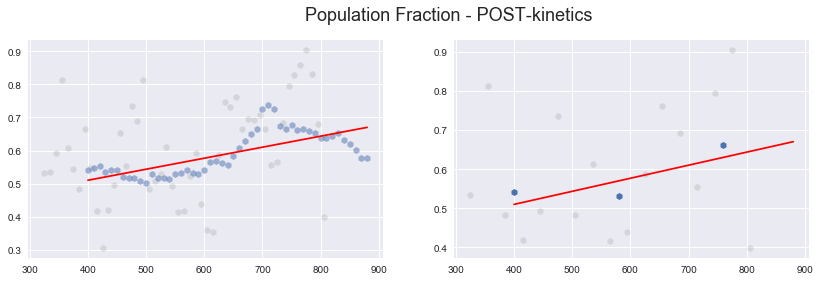

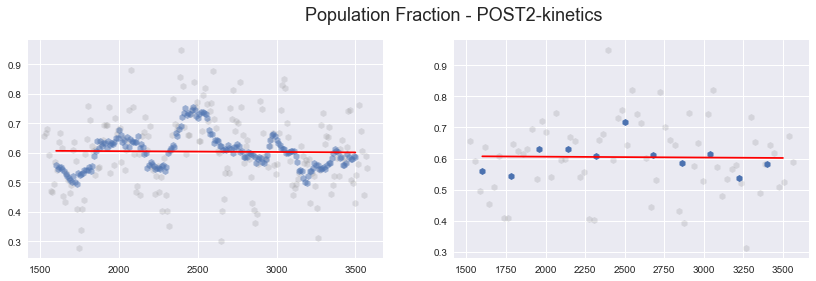

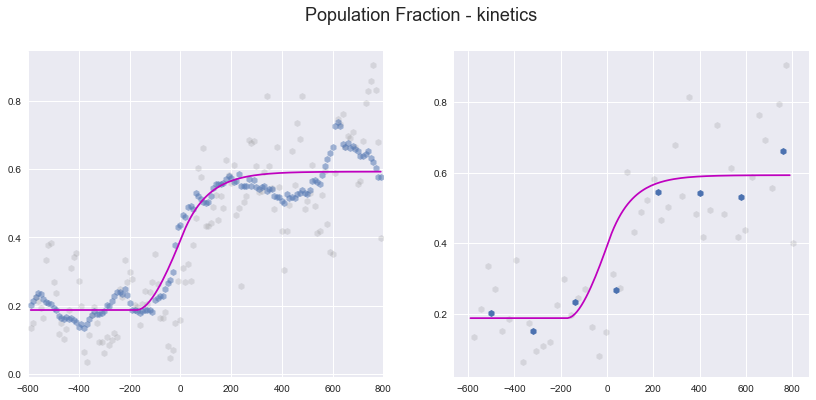

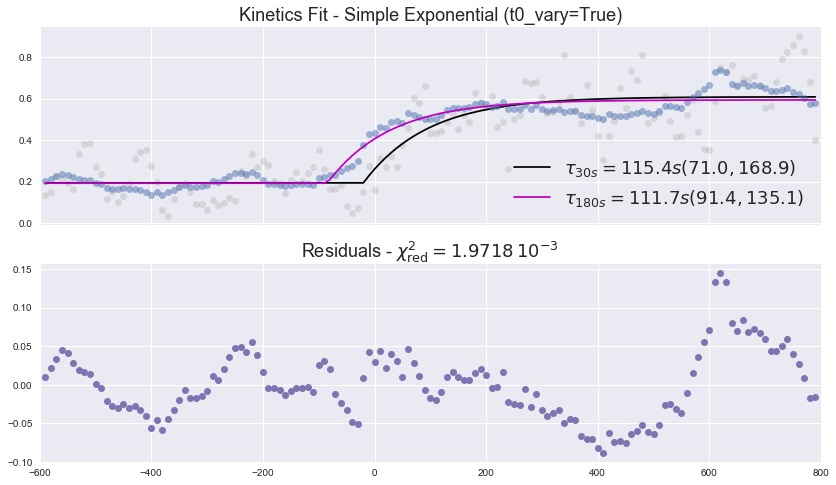

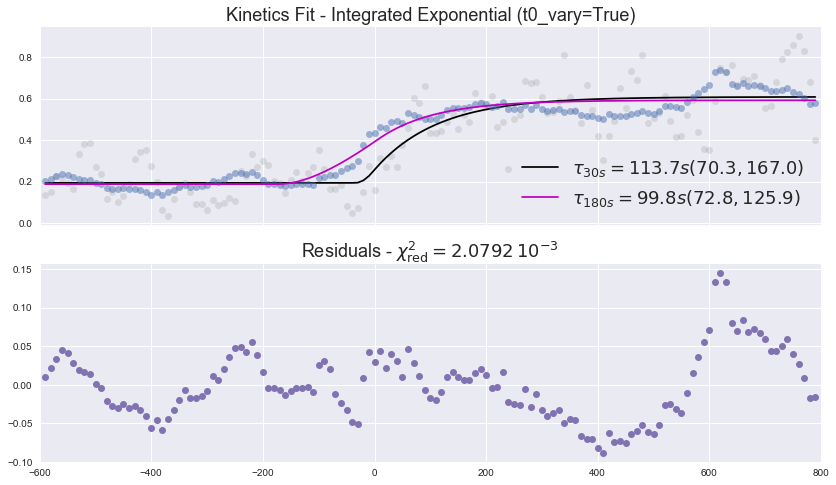

In [5]:
fitres, params = analysis.process(filenames[0], post = (300, 800), post2_start=1500)

### Example of reading fit results

In [6]:
res, resw, rest0f, reswt0f, ci, ciw = fitres

In [7]:
res[30].best_values

{'final_value': 0.60929709105487928,
 'init_value': 0.19335799053968372,
 't0': -20.004145845308798,
 'tau': 115.42828763399677}

In [8]:
resw[180].best_values

{'decimation': 5,
 'final_value': 0.59259020122492345,
 'init_value': 0.18731888881095093,
 'sigma': 0,
 't0': 5.999797076915681,
 't_window': 180,
 'tau': 99.846070642124729}

In [9]:
import lmfit

In [10]:
lmfit.report_fit(resw[180])

[[Fit Statistics]]
    # function evals   = 69
    # data points      = 139
    # variables        = 4
    chi-square         = 0.281
    reduced chi-square = 0.002
    Akaike info crit   = -854.494
    Bayesian info crit = -842.756
[[Variables]]
    t0:            5.99979707 +/- 14.16803 (236.14%) (init= 0)
    t_window:      180 (fixed)
    tau:           99.8460706 +/- 18.10313 (18.13%) (init= 150)
    init_value:    0.18731888 +/- 0.006732 (3.59%) (init= 0.1)
    final_value:   0.59259020 +/- 0.006992 (1.18%) (init= 0.9)
    sigma:         0 (fixed)
    decimation:    5 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(t0, tau)                   = -0.845 
    C(tau, final_value)          =  0.572 
    C(t0, final_value)           = -0.337 
    C(t0, init_value)            =  0.323 
    C(tau, init_value)           = -0.144 


In [11]:
lmfit.report_ci(ciw[180])

                99.70%    95.00%    67.40%    _BEST_    67.40%    95.00%    99.70%
 t0         : -47.50857 -30.96673 -15.40724   5.99980 +17.73567 +36.44949 +60.17785
 tau        : -80.62394 -52.15628 -27.04266  99.84607 +26.09898 +54.99662 +88.18142
 init_value :  -0.02012  -0.01313  -0.00651   0.18732  +0.00654  +0.01310  +0.01998
 final_value:  -0.02320  -0.01591  -0.00842   0.59259  +0.00876  +0.01890  +0.03098


In [12]:
p1 = params['em', 30, 10]
p2 = params['em', 180, 10]

# Measurement 1

  PRE Number of bursts (detrended):   542.8 MEAN,   612.4 VAR,  1.128 VAR/MEAN
 POST Number of bursts (detrended):   285.6 MEAN,   174.8 VAR,  0.612 VAR/MEAN
POST2 Number of bursts (detrended):   435.5 MEAN,   969.6 VAR,  2.226 VAR/MEAN
  PRE Kinetics 30s:     1.671 STD, 0.304 STD detrended.
 POST Kinetics 30s:     3.794 STD, 0.685 STD detrended.
POST2 Kinetics 30s:     3.015 STD, 0.186 STD detrended.
 FIT  Simple Exp (t0_vary=False):  tau(w=30s) = 135.1s  tau(w=180s) = 70.4s  Delta = 47.9%
 FIT  Window Exp (t0_vary=False):  tau(w=30s) = 138.6s  tau(w=180s) = 145.7s  Delta = -5.1%


/Users/anto/miniconda3/lib/python3.5/site-packages/lmfit/confidence.py:295: UserWarning: Warning, rel_change=-0.014088067710909648 < 0.01  at iteration 21 and prob(t0=10.61400012802832) = 0.5978403846585193 < max(sigmas).
  warn(errmsg)
/Users/anto/miniconda3/lib/python3.5/site-packages/lmfit/confidence.py:295: UserWarning: Warning, rel_change=-1.0 < 0.01  at iteration 2 and prob(tau=74.65516297286013) = 0.0 < max(sigmas).
  warn(errmsg)
/Users/anto/miniconda3/lib/python3.5/site-packages/lmfit/confidence.py:295: UserWarning: Warning, rel_change=-0.00802020119767174 < 0.01  at iteration 4 and prob(init_value=0.1469854759495517) = 0.9888229420316024 < max(sigmas).
  warn(errmsg)
/Users/anto/miniconda3/lib/python3.5/site-packages/lmfit/confidence.py:295: UserWarning: Warning, rel_change=-0.01832979063846453 < 0.01  at iteration 3 and prob(final_value=0.4423840949920001) = 0.959383101992663 < max(sigmas).
  warn(errmsg)


 FIT  Simple Exp (t0_vary=True):  tau(w=30s) = 138.1s  tau(w=180s) = 109.1s  Delta = 21.0%


/Users/anto/miniconda3/lib/python3.5/site-packages/lmfit/confidence.py:295: UserWarning: Warning, rel_change=0.0 < 0.01  at iteration 1 and prob(t0=13.55873559256721) = 0.0 < max(sigmas).
  warn(errmsg)
/Users/anto/miniconda3/lib/python3.5/site-packages/lmfit/confidence.py:295: UserWarning: Warning, rel_change=0.0 < 0.01  at iteration 1 and prob(tau=98.7879923632581) = 0.0 < max(sigmas).
  warn(errmsg)
/Users/anto/miniconda3/lib/python3.5/site-packages/lmfit/confidence.py:295: UserWarning: Warning, rel_change=0.0 < 0.01  at iteration 1 and prob(init_value=0.11685782900684931) = 0.0 < max(sigmas).
  warn(errmsg)
/Users/anto/miniconda3/lib/python3.5/site-packages/lmfit/confidence.py:295: UserWarning: Warning, rel_change=0.0 < 0.01  at iteration 1 and prob(final_value=0.4690756133959275) = 0.0 < max(sigmas).
  warn(errmsg)


 FIT  Window Exp (t0_vary=True):  tau(w=30s) = 128.1s  tau(w=180s) = 70.3s  Delta = 45.1%


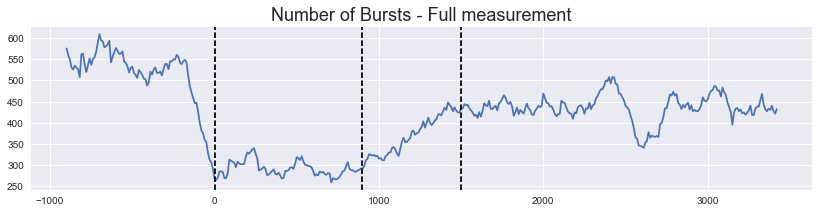

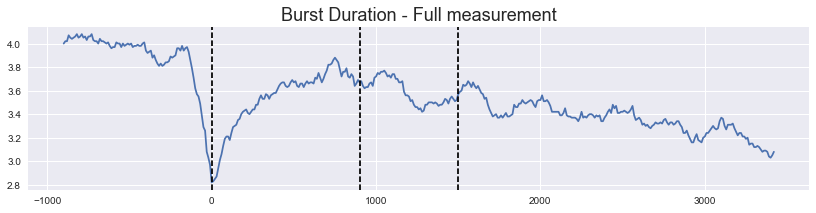

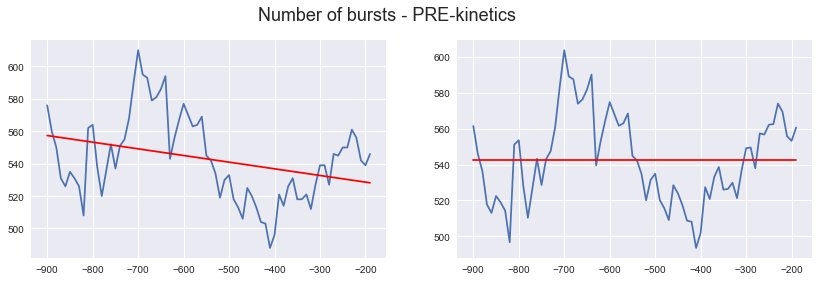

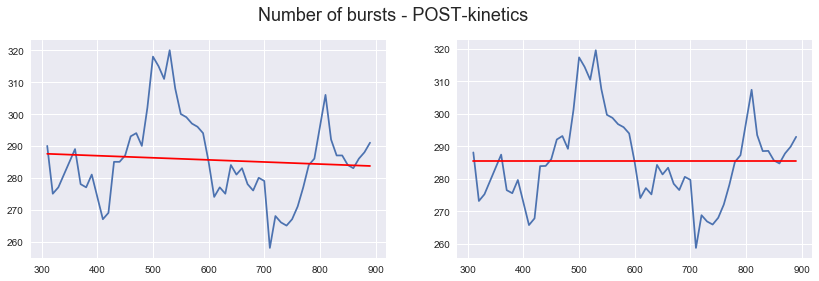

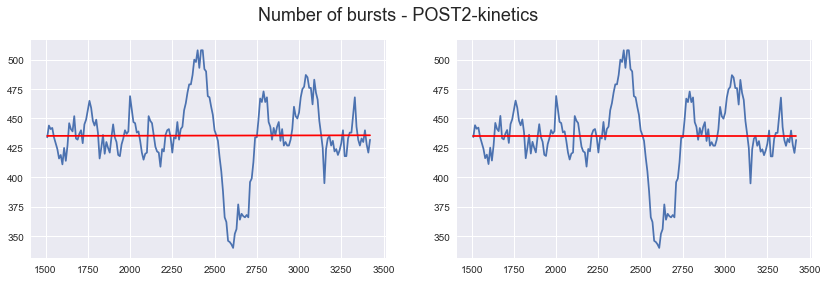

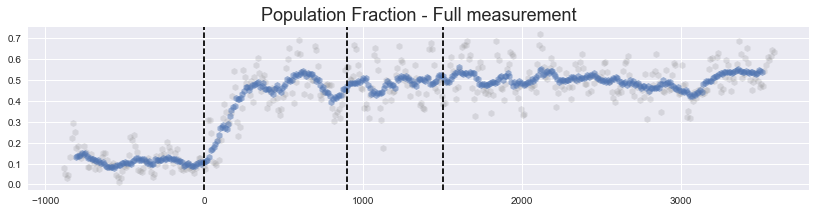

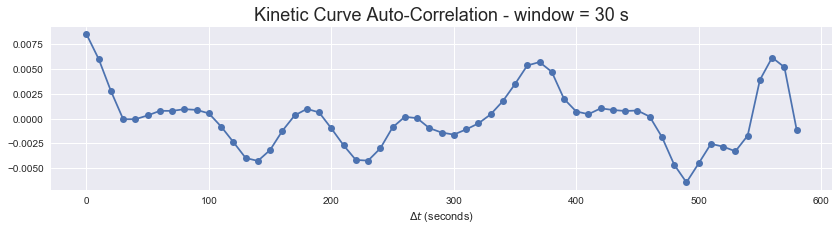

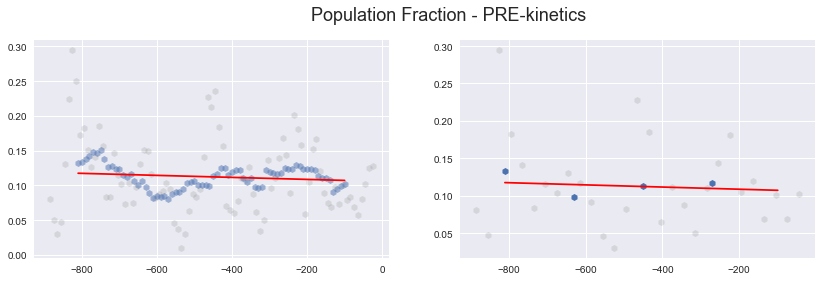

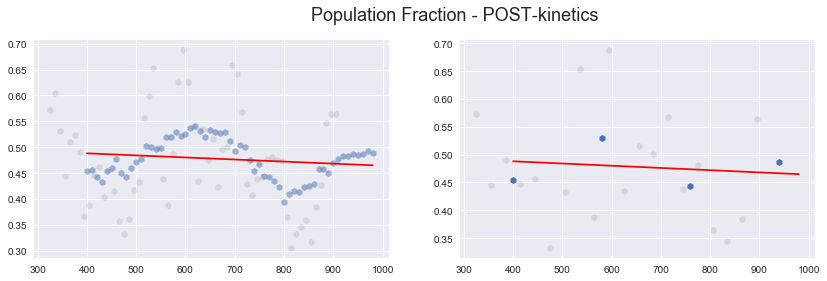

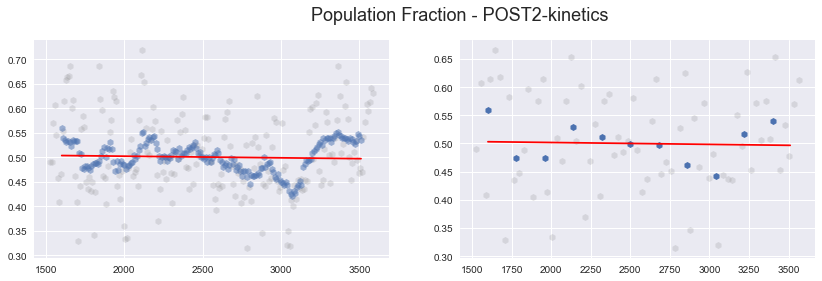

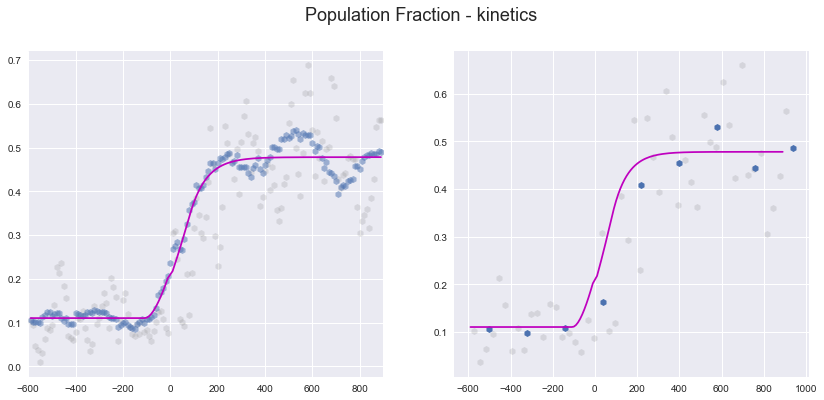

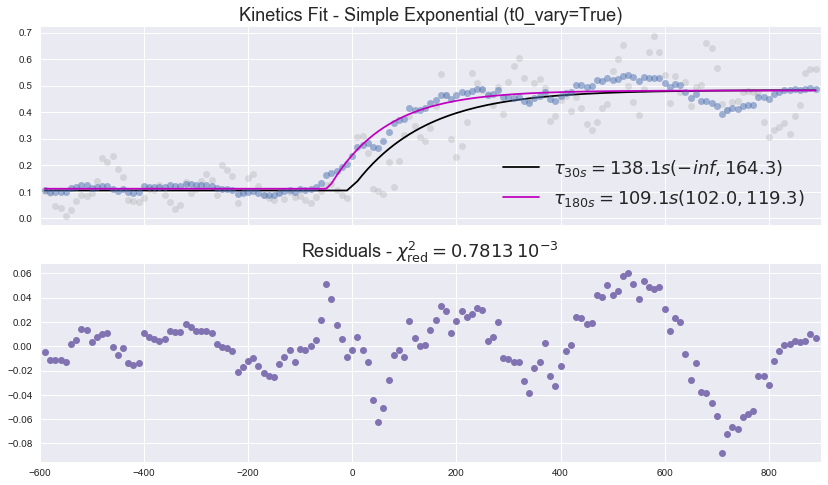

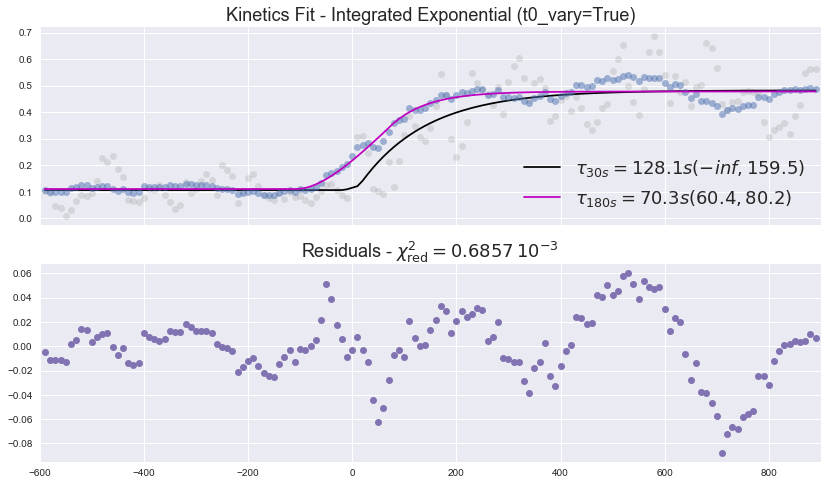

In [13]:
fitres, params = analysis.process(filenames[1], post = (300, 900), post2_start=1500)

# Measurement 2

  PRE Number of bursts (detrended):   914.9 MEAN,  8422.1 VAR,  9.205 VAR/MEAN
 POST Number of bursts (detrended):   412.5 MEAN,   744.1 VAR,  1.804 VAR/MEAN
POST2 Number of bursts (detrended):   537.3 MEAN,   753.3 VAR,  1.402 VAR/MEAN
  PRE Kinetics 30s:     2.627 STD, 1.714 STD detrended.
 POST Kinetics 30s:     5.268 STD, 3.911 STD detrended.
POST2 Kinetics 30s:     3.558 STD, 1.952 STD detrended.
 FIT  Simple Exp (t0_vary=False):  tau(w=30s) = 124.8s  tau(w=180s) = 63.8s  Delta = 48.9%
 FIT  Window Exp (t0_vary=False):  tau(w=30s) = 149.2s  tau(w=180s) = 164.9s  Delta = -10.5%
 FIT  Simple Exp (t0_vary=True):  tau(w=30s) = 156.0s  tau(w=180s) = 215.6s  Delta = -38.2%


/Users/anto/miniconda3/lib/python3.5/site-packages/lmfit/confidence.py:289: UserWarning: Warning, maxiter=200 reachedand prob(t0=-82.43320653013724) = 0.9954600637398703 < max(sigmas).
  warn(errmsg)


 FIT  Window Exp (t0_vary=True):  tau(w=30s) = 152.8s  tau(w=180s) = 210.7s  Delta = -37.9%


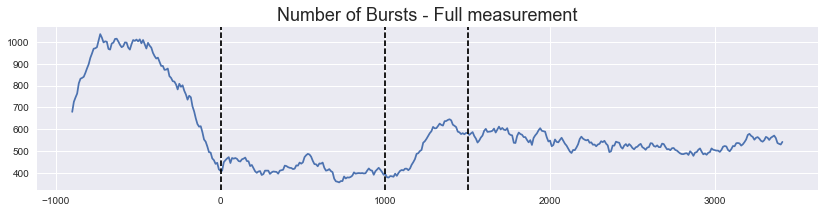

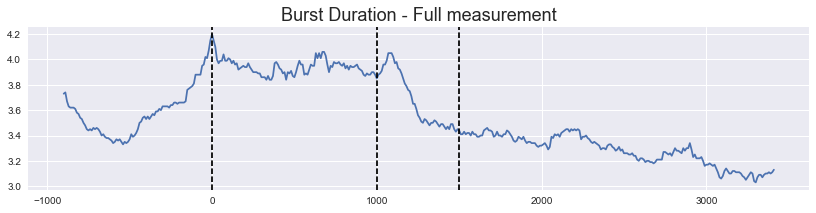

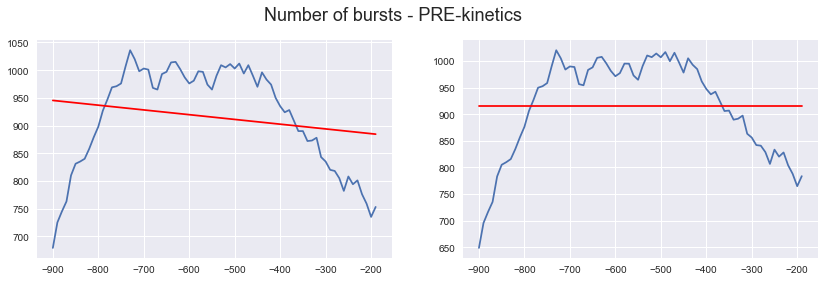

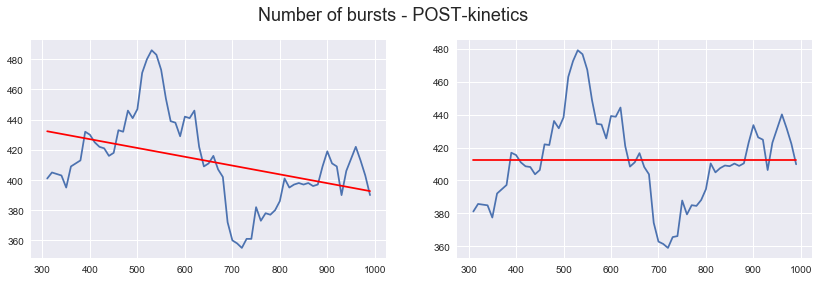

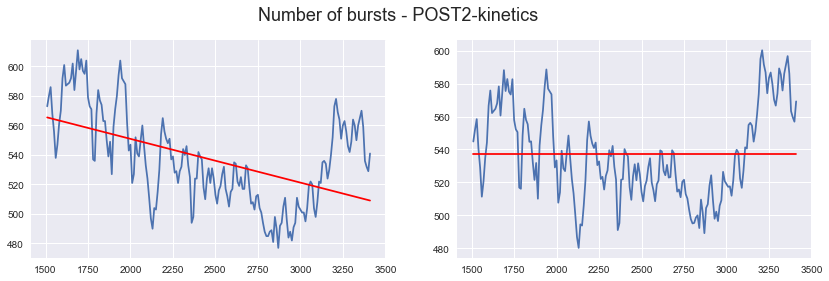

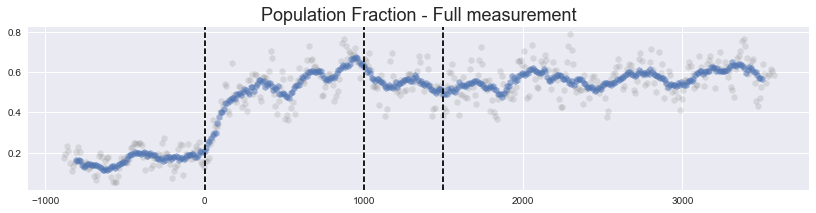

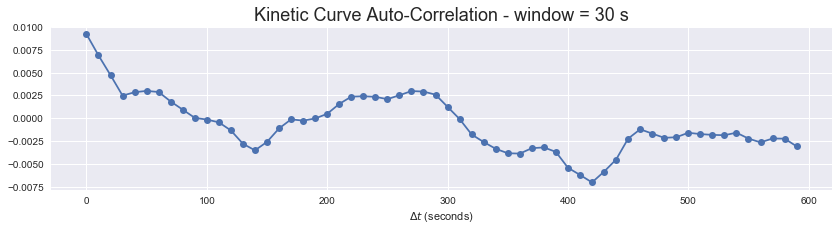

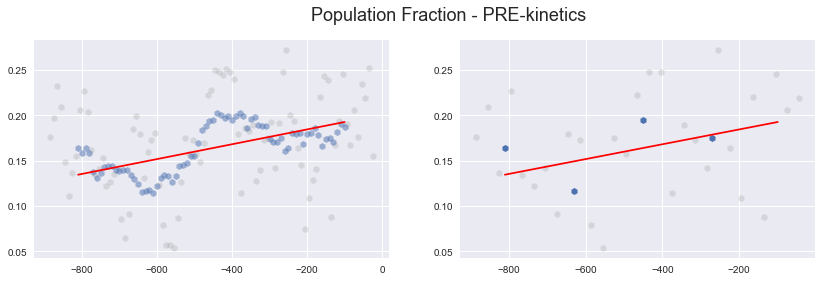

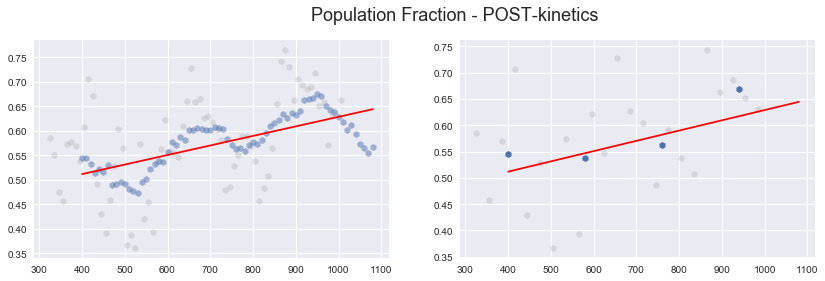

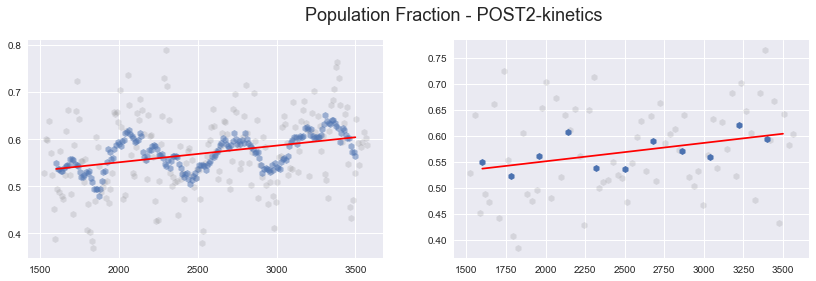

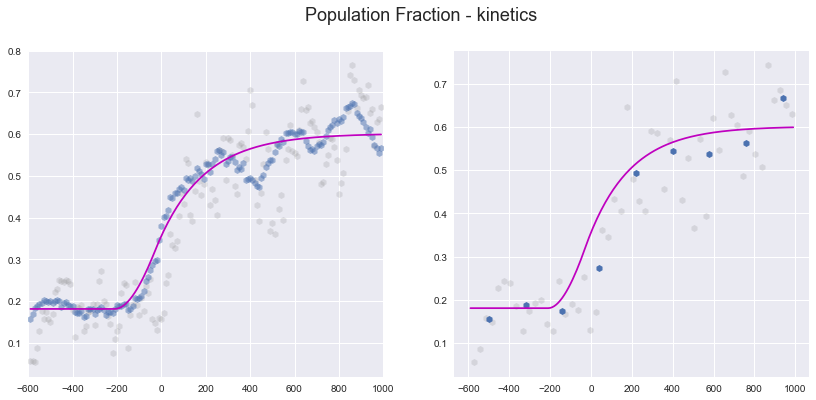

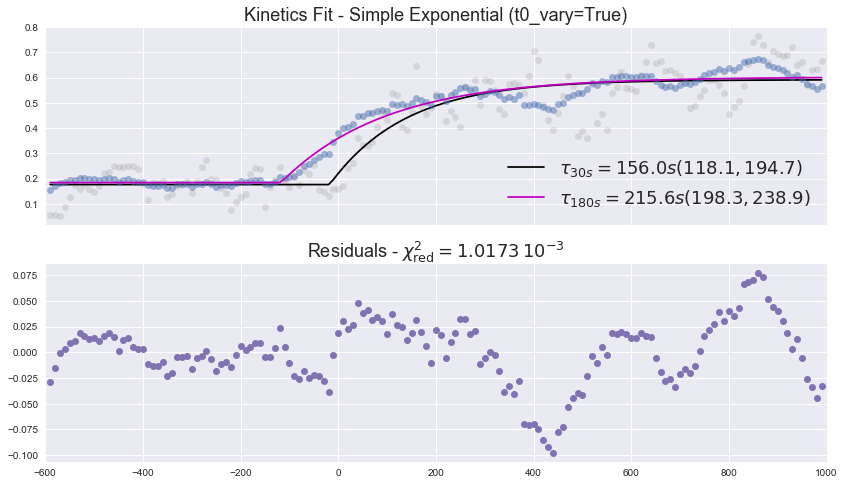

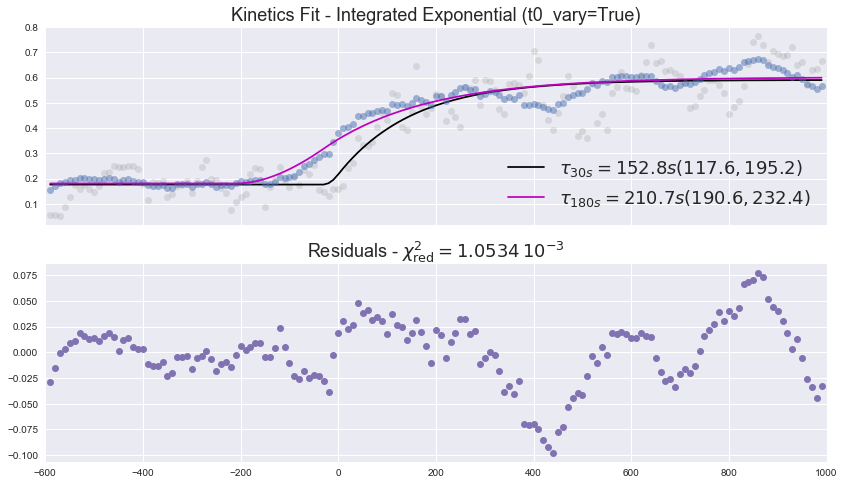

In [14]:
fitres, params = analysis.process(filenames[2], post = (300, 1000), post2_start=1500)

----

In [15]:
import time
print('Execution duration: %d s' % (time.time() - start_time))

Execution duration: 47 s
